<a href="https://colab.research.google.com/github/maxenlee/Deep-Dive/blob/main/Maxen%7Cproject6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Images – To Do List



Prior to starting this problem, be sure to enable the GPU runtime processing in your Jupyter notebook.



## Problem Definition



* Write a concise problem definition for the project. Put it in a text field at the top of your Jupyter notebook.

* Load necessary packages.



In [1]:

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from sklearn.preprocessing import minmax_scale

import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import plot_model

import requests
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.vgg16 import preprocess_input
from PIL import Image
import numpy as np
from io import BytesIO



In [33]:
!pip install boto3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 10.5 MB/s eta 0:00:00


In [34]:
import boto3
import pickle
import pandas as pd
import io
from google.colab import userdata

# Replace these with your credentials
access_key = userdata.get('PICKLEJAR_ACCESS')
secret_key = userdata.get('PICKLEJAR_SECRET')
region_name = 'nyc3'
endpoint_url = 'https://nyc3.digitaloceanspaces.com'
bucket_name = 'picklejar'
folder_name = 'Images'
image_path = '/content/IMG_4154.JPEG' # Update this path

# Step 1: Read and pickle the image
with open(image_path, 'rb') as image_file:
    image_data = image_file.read()
pickled_image = pickle.dumps(image_data)

# Step 2: Setup Boto3 client
session = boto3.session.Session()
client = session.client(
    's3',
    region_name=region_name,
    endpoint_url=endpoint_url,
    aws_access_key_id=access_key,
    aws_secret_access_key=secret_key
)

# Step 3: Upload the pickled image
object_name = f'{folder_name}/nova_.pkl'  # Change 'your_image_name.pkl' to your preferred object name
client.put_object(
    Bucket=bucket_name,
    Key=object_name,
    Body=pickled_image
)

# Verify upload (optional)
response = client.list_objects_v2(
    Bucket=bucket_name,
    Prefix=folder_name
)
print(response)


{'ResponseMetadata': {'RequestId': 'tx00000314b9ebb72168a8f-0065fe19d5-a019413-nyc3d', 'HostId': '', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amz-request-id': 'tx00000314b9ebb72168a8f-0065fe19d5-a019413-nyc3d', 'content-type': 'application/xml', 'date': 'Fri, 22 Mar 2024 23:52:53 GMT', 'strict-transport-security': 'max-age=15552000; includeSubDomains; preload', 'x-envoy-upstream-healthchecked-cluster': '', 'transfer-encoding': 'chunked'}, 'RetryAttempts': 0}, 'IsTruncated': False, 'Contents': [{'Key': 'Images/nova_.pkl', 'LastModified': datetime.datetime(2024, 3, 22, 23, 52, 53, 214000, tzinfo=tzlocal()), 'ETag': '"9cac1bd635b6c8c8ecb93edc40bf6d77"', 'Size': 3102846, 'StorageClass': 'STANDARD'}], 'Name': 'picklejar', 'Prefix': 'Images', 'MaxKeys': 1000, 'EncodingType': 'url', 'KeyCount': 1}


In [2]:
link_1 = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle'
link_2 = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle'
link_3 = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg'

## Data Collection



* Load pickled data from X.pickle and y.pickle from the AWS S3 bucket.



In [3]:
X = pickle.loads(requests.get(link_1).content)
y = np.array(pickle.loads(requests.get(link_2).content))



In [4]:

# Step 1: Fetch the image from the URL
response = requests.get(link_3)

# Step 2: Open the image with PIL
img = Image.open(BytesIO(response.content))

# Assuming you need to resize the image to 224x224 as before
img = img.resize((100, 100))

# Convert the image to a NumPy array
img_array = img_to_array(img)

# Normalize the pixel values (adjust this according to your model's needs)
img_array = preprocess_input(img_array)

# Expand dimensions to match the model's expected input shape
test = np.expand_dims(img_array, axis=0)

# Now 'img_array' is ready to be used as input to your model.


In [5]:
test.shape

(1, 100, 100, 3)

In [6]:
y.shape

(24946,)

## Data Cleaning



* Scale the values in X so that they fall between 0 and 1 by dividing by 255.



In [7]:
print(X.shape,'\n',
      X[0].shape,'\n',
      X[0][0].shape,'\n',
      X[0][0][0].shape,'\n',
      X[0][0][0][0].shape)


(24946, 100, 100, 1) 
 (100, 100, 1) 
 (100, 1) 
 (1,) 
 ()


In [8]:
X[0][0][0][0]

95

In [9]:
data_size = X.shape[0]
data_size

24946

In [10]:
f'{X.size:_}'

'249_460_000'

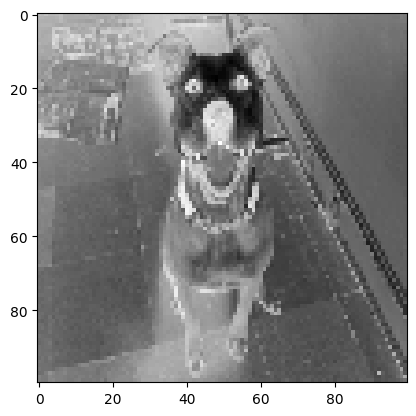

In [11]:
plt.imshow(X[24], cmap = plt.cm.gray_r)

In [12]:
print(X.min())
print(X.max())

0
255


In [13]:
# X = X / 255
X.shape

(24946, 100, 100, 1)

In [14]:
# Step 1: Flatten each image to a 1D array
X_flattened = X.flatten()
X_flattened.shape

(249460000,)

In [15]:
# Step 2: Apply minmax_scale across each image (row)
X_scaled = minmax_scale(X_flattened)

In [16]:
X_scaled.shape

(249460000,)

In [17]:
# print(max(X_scaled))

In [18]:
np.max(X_scaled)

1.0

In [19]:
X_scaled.max()

1.0

In [20]:
X_flattened.max()


255

In [21]:

# Step 3: Reshape back to original shape
X_scaled_T4 = X_scaled.reshape(X.shape)

# Now X_scaled should have the same shape as X, but with pixel values scaled to [0, 1]


In [22]:
X_scaled_T4.shape

(24946, 100, 100, 1)

Checking for bias in target

In [23]:
ysum = sum(y)
ylen = len(y)
print(ylen/ysum)

1.999519076627124


## Exploratory Data Analysis



* Look at the shape of X and y. Ensure that X is 4 dimensional.

* Plot one of the images in X using plt.imshow().

* Look at the response value in y for that image.



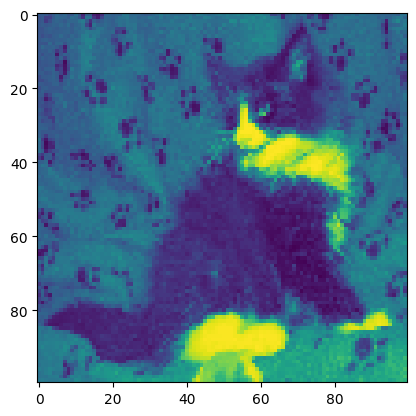

In [24]:
ran = np.random.randint(data_size)
plt.imshow(X[ran])

## Data Processing


In [25]:
f = (X - X.min())/(X.max()-X.min())
f.max()

1.0


* Split X and y into training and testing sets.

*  Build a neural network with the following:
  * Sequential layers
  * At least two 2D convolutional layers using the 'relu' activation function and a (3,3) kernel size.
  * A MaxPooling2D layer after each 2D convolutional layer that has a pool size of (2,2).
  * A dense output layer using the 'sigmoid' activation function.
  Note: you can play around with the number of layers and nodes to try to get better performance.

* Compile your model. Use the 'adam' optimizer. Determine which loss function and metric is most appropriate for this problem.

* Fit your model using the training set.

* Evaluate your model using the testing set.

* Define a function that will read in a new image and convert it to a 4 dimensional array of pixels (ask the instructor for help with this). Hint: numpy.ndarray.reshape

* Use the function defined above to read in the dog.jpg image that is saved in the AWS S3 bucket.

* Use the neural network you created to predict whether the image is a dog or a cat.



### Split Train

In [26]:
# rand = np.random.seed(42)
split_size = data_size // 5
split_size

4989

In [27]:
split_size/data_size

0.1999919826825944

In [28]:


X_train= X_scaled_T4[:split_size]
X_test= X_scaled_T4[split_size:]
y_train= y[:split_size]
y_test= y[split_size:]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

(4989, 100, 100, 1)
(19957, 100, 100, 1)
(4989,)
(19957,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Building layers

In [29]:

# Create a Sequential model
model = Sequential()


# Add the first convolutional layer
model.add(Conv2D(filters = 64,
                 input_shape = X_train.shape[1:],
                 kernel_size=(3, 3),
                 activation='relu',
                 ))

# Add the first max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the second convolutional layer
model.add(Conv2D(filters = 64,
                 input_shape = X_train.shape[1:],
                 kernel_size=(3, 3),
                 activation='relu',
                 ))

# Add the second max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add the output layer with 'sigmoid' activation
model.add(Dense(units= 1,
                activation='sigmoid'))



In [30]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics= ['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 33856)             0         
                                                                 
 dense (Dense)               (None, 1)                 3

In [31]:
# Fit the model
model.fit(X_train, y_train, epochs=10)


Epoch 1/10
156/156 [==============================] - 114s 725ms/step - loss: 0.6757 - accuracy: 0.5711
Epoch 2/10
156/156 [==============================] - 111s 710ms/step - loss: 0.6061 - accuracy: 0.6673
Epoch 3/10
156/156 [==============================] - 112s 717ms/step - loss: 0.5393 - accuracy: 0.7328
Epoch 4/10
156/156 [==============================] - 116s 744ms/step - loss: 0.4971 - accuracy: 0.7621
Epoch 5/10
156/156 [==============================] - 117s 748ms/step - loss: 0.4433 - accuracy: 0.7974
Epoch 6/10
156/156 [==============================] - 117s 745ms/step - loss: 0.4018 - accuracy: 0.8196
Epoch 7/10
156/156 [==============================] - 115s 736ms/step - loss: 0.3561 - accuracy: 0.8453
Epoch 8/10
156/156 [==============================] - 127s 815ms/step - loss: 0.3031 - accuracy: 0.8741
Epoch 9/10
156/156 [==============================] - 121s 776ms/step - loss: 0.2664 - accuracy: 0.8884
Epoch 10/10
156/156 [==============================] - 115s 735m

In [32]:

# Evaluate the model
model.evaluate(X_test, y_test)

# Define a function to read in a new image and convert it to a 4 dimensional array of pixels
def read_image(image_path):
  # Read the image using OpenCV
  image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

  # Resize the image to 28x28 pixels
  image = cv2.resize(image, (28, 28))

  # Convert the image to a 4 dimensional array of pixels
  image = image.reshape(1, 28, 28, 1)

  return image

# Read in the dog.jpg image
image_path = 'dog.jpg'
image = read_image(image_path)

# Predict whether the image is a dog or a cat
prediction = model.predict(image)

# Print the prediction
print(prediction)


624/624 [==============================] - 124s 199ms/step - loss: 0.6911 - accuracy: 0.7243


NameError: name 'cv2' is not defined

## Communication of Results



* Communicate the results of your analysis.



## **BONUS** (optional)



* Upload an image of your (or your friend's or family's) dog or cat and use your model to predict whether the image is a dog or cat.
* Hint: you'll probably need to convert the image from color to grayscale.  OpenCV, pillow, and other libraries are your friend.